<a href="https://colab.research.google.com/github/supriyasri/PYTHON-MANIA-/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
#Linear Regression(simple Regression)

In [0]:
#Import libraries
import numpy
import pandas
import sklearn
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline                    #specialfunctions called as ipython

In [0]:
from sklearn import datasets, linear_model                     # predefined functions are imported here 
from sklearn.linear_model import LinearRegression,Ridge,Lasso  #output is numeric-go with regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score      # r2 is the difference between predicted and actual one
from sklearn.datasets import load_boston       
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge



In [0]:
regression_data = pandas.read_csv('datasetsforalgrthms/simple_regression_data.csv')

EXPLORATORY DATA ANALYSIS


In [0]:
regression_data.head()

,Volume,Price
0,4.690628,27.000389
1,4.235716,24.925126
2,4.626838,20.931068
3,6.166307,31.296321
4,3.433759,17.315909


Text(0.5, 1.0, 'Price - Volume Data')

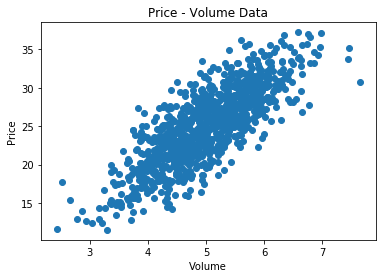

In [0]:
plt.scatter(regression_data['Volume'],regression_data['Price'])
plt.xlabel('Volume')
plt.ylabel('Price')                  
plt.title('Price - Volume Data')   
  # why we r using scater plot --to explain relation between two variables

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

Text(0.5, 1.0, 'Price - Volume Data')

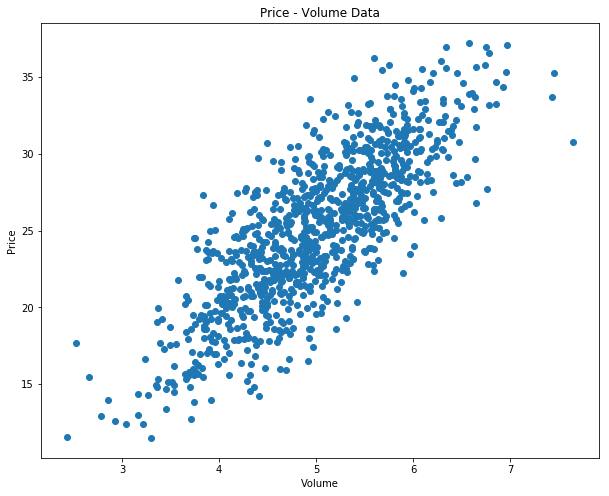

In [0]:
plt.scatter(regression_data['Volume'],regression_data['Price'])
plt.xlabel('Volume')
plt.ylabel('Price')
plt.title('Price - Volume Data')

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(regression_data['Volume'], regression_data['Price'], test_size=0.20)

In [0]:
SPLIT TRAIN TEST DATASET



In [0]:
simple_linear_regression = LinearRegression()

X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
simple_linear_regression.fit(pandas.DataFrame(X_train), pandas.DataFrame(Y_train))

Y_pred= simple_linear_regression.predict(pandas.DataFrame(X_test))

In [0]:
print("Mean squared error: %.1f" % mean_squared_error(Y_test,Y_pred))
 # square distance between predicted value to actual data

Mean squared error: 9.2


In [0]:
print('R2 Score: %.2f' % r2_score(Y_test,Y_pred)) 
 #distance between actual data to predicted value

R2 Score: 0.59


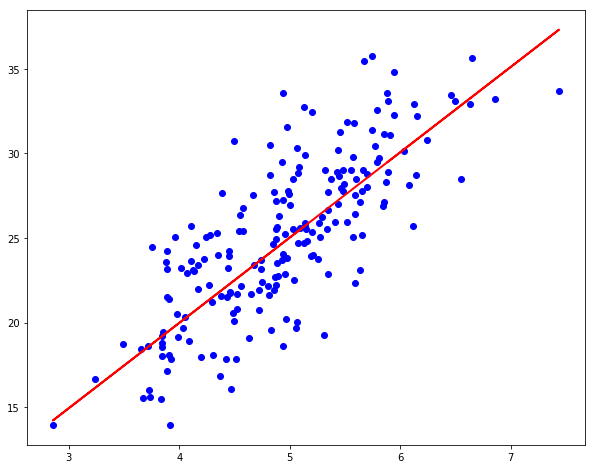

In [0]:
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, Y_pred, color='red', linewidth=2,)

In [0]:
#Polynomial Regression

In [0]:
boston_data = load_boston()

In [0]:
boston_data.keys()      # to access data from tuple or list--like a[0],a[1] 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [0]:
boston_data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [0]:
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [0]:
CRIM : crime rate per capita
ZN : proportion of residential land zoned
INDUS : proportion of non-retail business acres
CHAS : binary variable. 1 for tract bounds river and 0 otherwise
NOX : nitric oxides concentration
RM : average number of rooms
AGE : Owner occupied units
DIS : weighted distance to employment centers.
RAD : index of accessibility
TAX : full value property tax rate
PTRATIO : pupil-teacher ratio
B : proportion of blacks
LSTAT : lower status of population
MEDV : owner occupied homes

In [0]:
boston_data_frame = pandas.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [0]:
boston_data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
boston_data_frame['Price'] = boston_data.target

In [0]:
boston_data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
boston_data_frame.isnull().sum()    #particular feature null value count

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [0]:
boston_data_X = boston_data_frame[boston_data_frame.columns[0:13]]
boston_data_Y = boston_data_frame[boston_data_frame.columns[13:14]]

In [0]:
boston_data_X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


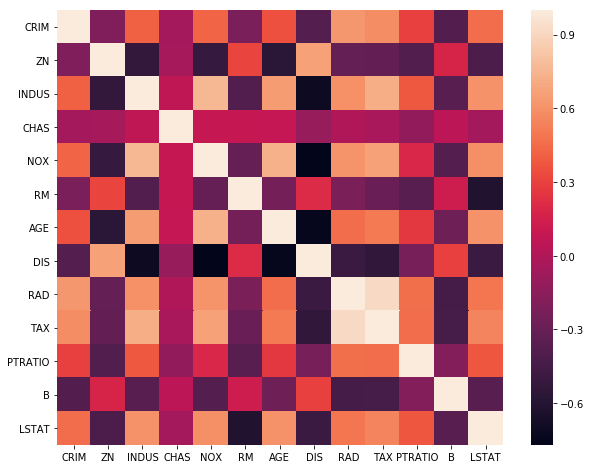

In [0]:
seaborn.heatmap(boston_data_X.corr()) 
#values in matrices are represented as colors

In [0]:
abs_corr_matrix = boston_data_X.corr().abs()

up_tri = abs_corr_matrix.where(numpy.triu(numpy.ones(abs_corr_matrix.shape), k=1).astype(numpy.bool))

correlated_features = [column for column in up_tri.columns if any(up_tri[column] > 0.75)]

print(correlated_features)

['NOX', 'DIS', 'TAX']


In [0]:
boston_data_X = boston_data_X.drop(correlated_features, axis=1)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(boston_data_X, boston_data_Y, test_size=0.20)

In [0]:
linear_regression = LinearRegression()    #LinearRegression()  is a pre-defined class
class LR:
  def abc(self):
    species='animal'
a=LR()
a.abc()
 

  # we have created an instance for this, i meanwe are calling the instance using object refernece 

In [0]:
linear_regression.fit(X_train,Y_train)  # fit is having two parameter X_train,Y_train, equivalent to a.abc()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
Y_pred = linear_regression.predict(X_test)   #algorithmic output

In [0]:
print("Mean squared error: %.1f" % mean_squared_error(Y_test,Y_pred))

Mean squared error: 34.7


In [0]:
print('R2 Score: %.2f' % r2_score(Y_test,Y_pred))

R2 Score: 0.65


In [0]:
Y_test['Pred'] = Y_pred
Y_test['Difference'] = abs(Y_test['Pred'] - Y_test['Price'])
Y_test.head()

,Price,Pred,Difference
213,28.1,23.889417,4.210583
324,25.0,25.331932,0.331932
39,30.8,28.790660,2.009340
346,17.2,20.784780,3.584780
371,50.0,22.441426,27.558574


In [0]:
class LinearRegression1:
  def fit1(self,x,y):
    print("implementation of Linear regression")
    
linear_regression1=LinearRegression1()              #linear_regression = LinearRegression()
linear_regression1.fit1(2,3)                        #linear_regression.fit(X_train,Y_train)

LinearRegression1.fit1(2,4,5)
    

implementation of Linear regression
implementation of Linear regression


In [0]:
complex=3-4j
abs(complex)

5.0

In [0]:
a=-0
abs(a)

0